In [1]:
# Clustering methods
import json
import numpy as np
import pandas as pd
import os
from libraries.utils import get_paths, read_traces, read_json, mapint2var, is_consistent

In [2]:
# Configuration
CODE = 'lora_ducy'               ### application (code) theft_protection, mamba2, lora_ducy
BEHAVIOUR_FAULTY = 'faulty_data'        ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'             ### normal, faulty_data
THREAD = 'single'                       ### single, multi
VER = 3                                 ### format of data collection

base_dir = './trace_data'              ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print("Normal base path:", normalbase_path)
print("Faulty base path:", faultybase_path)

Normal base path: ./trace_data/lora_ducy/single_thread/version_3/normal
Faulty base path: ./trace_data/lora_ducy/single_thread/version_3/faulty_data


In [3]:
train_base_path = os.path.join(normalbase_path, 'train_data')
print("Train base path:", train_base_path)

train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = [os.path.join(normalbase_path, x) for x in os.listdir(normalbase_path) if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

test_data_path = paths_traces
test_label_path = paths_label

Train base path: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data


In [4]:
# Function to read the data and transform into separate files with 50 as sequence length and window size of 1
import os
def read_process_train_data(file_path, sequence_length, window_size):
    count = 0
    output_directory = './train_data_processed/'
    filename_dictionary = {}
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in file_path:
        result = []
        print("Reading file:", filename)
        count = count + 1
        with open(filename, 'r') as f:
            data = json.load(f)
        
        event_ids = [item[0] for item in data]
        timestamps = [item[1] for item in data]
        timestamp_difference = np.diff(timestamps).tolist()
        trimmed_event_ids = event_ids[1:]

        filename = f'trace_trial{count}' 

        for i in range(0, len(trimmed_event_ids) - sequence_length + 1, window_size):
            event_id_seq_len = trimmed_event_ids[i:i+sequence_length]
            timestamp_diff_seq_len = timestamp_difference[i:i+sequence_length]
            result = [event_id_seq_len, timestamp_diff_seq_len]

            index_start = i
            index_end = i + sequence_length
            new_filename = f'{filename}_{index_start}-{index_end}.json'
            output_path = os.path.join(output_directory, new_filename)

            #Saving the file
            with open(output_path, 'w') as out_file:
                json.dump(result, out_file)
            
            #Saving to dictionary for easy backtracking
            filename_dictionary[new_filename] = {
                "source_file": filename,
                "data_start_index": index_start,
                "data_end_index": index_end,
                "sequence_length": sequence_length,
                "window_size": window_size
            }
    
    dictionary_path = f'{output_directory}/file_dict/'
    if not os.path.exists(dictionary_path):
        os.makedirs(dictionary_path)
    
    dict_path = os.path.join(dictionary_path,'filename_dict.json')

    with open(dict_path, 'w') as track_dict:
        json.dump(filename_dictionary, track_dict, indent=2)
    
    print("Filename Dictionary saved to :", dict_path)

In [5]:
train_data_path

['./trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial1.json',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial10',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial11',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial12',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial2.json',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial3',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial5',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial6',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial7',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial8',
 './trace_data/lora_ducy/single_thread/version_3/normal\\train_data\\trace_trial9']

In [6]:
# processing the data
sequence_length = 50
window_size = 1
train_data_processed = read_process_train_data(train_data_path,sequence_length,window_size)

Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial1.json
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial10
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial11
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial12
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial2.json
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial3
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial5
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial6
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial7
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal\train_data\trace_trial8
Reading file: ./trace_data/lora_ducy/single_thread/version_3/normal

In [7]:
import os
import json
def load_data(file_path):
    traces = []
    filenames = []
    for file in os.listdir(file_path):
        if file.endswith('.json') and not file.startswith('filename_dict'):
            with open(os.path.join(file_path, file), 'r') as f:
                data = json.load(f)
                traces.append(data)
                filenames.append(file)
    return traces, filenames


In [8]:
processed_train_data_path = './train_data_processed/'
traces, files = load_data(processed_train_data_path)

In [9]:
from libraries.anomaly_detection import extract_features_seglearn
features_df = extract_features_seglearn(traces)

final_feature_names 54


In [10]:
from sklearn.cluster import KMeans

def cluster_features(df, n_clusters):
    kmeans = KMeans(n_clusters,init="k-means++", max_iter=300, n_init=30, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    print("kmeans:", labels)
    return kmeans

In [11]:
from sklearn.metrics import silhouette_score

def find_n_clusters_value(data, min_k, max_k):
    best_k = min_k
    best_score = -1

    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_k = k
    
    return best_k

In [12]:
# Clustering
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
features_df_clean = features_df.dropna()
valid_index = features_df_clean.index
filtered_files = [files[i] for i in valid_index]

X_scaled = scaler.fit_transform(features_df_clean)

N_Clusters = find_n_clusters_value(X_scaled, min_k=6, max_k=10)
print("\n optimal number of clusters: ", N_Clusters)

kmeans_model = cluster_features(pd.DataFrame(X_scaled), N_Clusters)
features_df_clean['cluster'] = kmeans_model.labels_
features_df_clean['file'] = filtered_files

train_features = X_scaled
train_labels = kmeans_model.labels_



model_save_path = './trained_model/'
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

joblib.dump(kmeans_model, f'{model_save_path}kmeans_model.pkl')

joblib.dump(train_features, f'{model_save_path}train_features.pkl')
joblib.dump(train_labels, f'{model_save_path}train_clusters.pkl')

# Saving the scaler
scaler_save_path = './scalers/'
if not os.path.exists(scaler_save_path):
    os.makedirs(scaler_save_path)
joblib.dump(scaler, f'{scaler_save_path}scaler.pkl')


print("\n Cluster assignments")
print(features_df_clean[['file', 'cluster']])

# features_df.to_csv("clustered_features_seglearn.csv", index=False)
# print("\n file saved")

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
 


 optimal number of clusters:  6
kmeans: [3 3 3 ... 5 5 5]

 Cluster assignments
                               file  cluster
0           trace_trial10_0-50.json        3
1           trace_trial10_1-51.json        3
2          trace_trial10_10-60.json        3
3        trace_trial10_100-150.json        2
4      trace_trial10_1000-1050.json        2
...                             ...      ...
13807    trace_trial9_995-1045.json        5
13808    trace_trial9_996-1046.json        5
13809    trace_trial9_997-1047.json        5
13810    trace_trial9_998-1048.json        5
13811    trace_trial9_999-1049.json        5

[13812 rows x 2 columns]


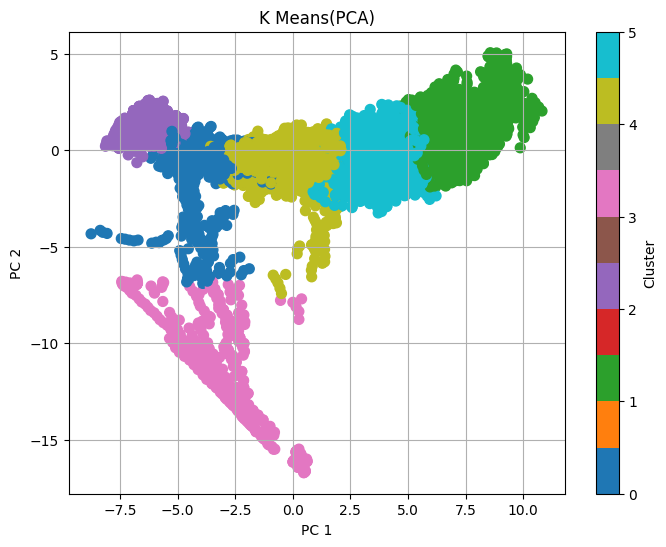

In [13]:
# Plotting the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features_df_clean['cluster'], cmap='tab10', s=50)
plt.title("K Means(PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()


In [14]:
# prediction for test data
from libraries.anomaly_detection import test_single_for_clustering, merge_detections, get_correct_detections

## checking the detections against the ground truth
DIFF_VAL = 0 
all_detections = []         # To store detections for each file
y_pred_all = []             # To store the predicted labels
y_true_all = []             # To store the ground truth labels
all_tp = []                 # To store all true positives
all_fp = []                 # To store all false positives
all_fn = []                 # To store all false negatives
all_gt = []                 # To store the ground truth
sequence_length = 50                                                # Sequence length for the model

# Loading the model and scaler
model_path = f'{model_save_path}kmeans_model.pkl'
loaded_kmeans_model = joblib.load(model_path)

scaler_path = f'{scaler_save_path}scaler.pkl'
loaded_scaler = joblib.load(scaler_path) 


trained_features_path = f'{model_save_path}train_features.pkl'
trained_clusters_path = f'{model_save_path}train_clusters.pkl'
trained_features = joblib.load(trained_features_path)
trained_cluster_labels = joblib.load(trained_clusters_path)

# Iterating through each test data file and label file
for test_data, test_label in zip(test_data_path, test_label_path):
    detection, inference_time = test_single_for_clustering(test_data,sequence_length,trained_features, trained_cluster_labels,loaded_scaler)            # Detecting anomalies in the test data
    print("Detection : ", detection)

    print("len(detection) : ", len(detection))

    all_detections.append((test_data, detection, test_label))
    merge_detection, agg_ts = merge_detections(detection, diff_val=DIFF_VAL)

    print("Merge detection : ", merge_detection)
    
    ground_truth_raw = read_traces(test_label)                                               # read ground truth labels from the label file
    ground_truth = ground_truth_raw['labels']                                                # extract labels from dictionary from ground truth data

    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]

    correct_pred, rest_pred, y_pred, y_true, false_neg = get_correct_detections(merge_detection, ground_truth)  # Comparing detected anomaly with ground truth

    y_pred_all.extend(y_pred)          # predicted labels
    y_true_all.extend(y_true)          # actual ground truth labels
    all_tp.append((test_data, correct_pred, test_label))
    all_fp.append((test_data, rest_pred, test_label))
    all_fn.append((test_data, false_neg, test_label))
    all_gt.append((test_data, ground_truth, test_label))

    print("Inference time : ", inference_time)

final_feature_names 54
Detection :  [[(1750, 1759), (609682, 610638), 'trace_trial1']]
len(detection) :  1
sorted detecions: [[(1750, 1759), (609682, 610638), 'trace_trial1']]
Merge detection :  []
Inference time :  2.052783966064453
final_feature_names 54
Detection :  [[(900, 949), (361396, 402955), 'trace_trial2'], [(950, 999), (402962, 417263), 'trace_trial2']]
len(detection) :  2
sorted detecions: [[(900, 949), (361396, 402955), 'trace_trial2'], [(950, 999), (402962, 417263), 'trace_trial2']]
Merge detection :  [[(900, 900), (361396, 402955), 'trace_trial2'], [(950, 950), (402962, 417263), 'trace_trial2']]
Inference time :  2.410888671875
final_feature_names 54
Detection :  [[(400, 449), (77486, 101470), 'trace_trial3'], [(900, 949), (273008, 299524), 'trace_trial3']]
len(detection) :  2
sorted detecions: [[(400, 449), (77486, 101470), 'trace_trial3'], [(900, 949), (273008, 299524), 'trace_trial3']]
Merge detection :  [[(400, 400), (77486, 101470), 'trace_trial3'], [(900, 900), (27

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_all = np.array(y_pred_all)
y_true_all = np.array(y_true_all)

# Calculate evaluation metrics
precision = precision_score(y_true_all, y_pred_all)
recall = recall_score(y_true_all, y_pred_all)
f1 = f1_score(y_true_all, y_pred_all)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.2500
Recall: 0.1429
F1 Score: 0.1818


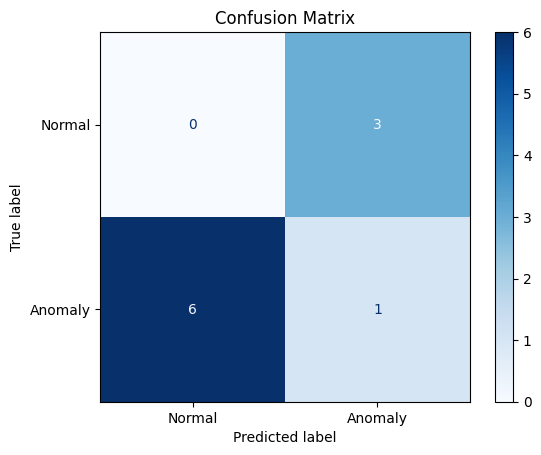

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_matrix = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()